# Individual NN Classification Assignment (Spring 2024)
**Dr. Dave Wanik - University of Connecticut**

* Full Name: Patricia (PJ) Watson
* Student ID (7 digit number): 2887247

---------------------------------------------------------------------------

Each student must complete and submit their own file, but you may work with your group for help. I do not want to see direct copy and pasted code otherwise you will get a zero.

1. Read the data dictionary and description from here:

* https://oehha.ca.gov/media/downloads/calenviroscreen/document/calenviroscreen40resultsdatadictionaryf2021.zip

 Download the data using gdown, read the Excel file using pandas, print the first 10 rows using df.head() and use df.info() to examine the data types and missing values.

2. Simplify the raw dataframe so that you only keep the columns you need. The `X` variable will be the following columns: `Population`, `Ozone` through `Solid Waste Pctl`, and `Asthma` through `Linguistic Isolation Pctl`. The `y` variable will be `Poverty`. Examine the quality of each column and use your judgement about dropping rows or imputing missing values. Add text cells and lots of comments so we can understand your logic/justification!

3. Recode the target variable to a 1 if greater than the mean value of poverty, otherwise make it a 0. Use this recoded variable as the target variable! Now it is a classification problem.

4. Make two interesting plots or tables and a description of why you made the table and what you see.

5. Do an 90/10 split for X_train, X_test, y_train, y_test where the random seed is equal to your 7 digit studentID number.

6. Use the StandardScaler() on train and apply to test partition. Do not scale the target variable!

7. Build a model using the Sequential API (like we do in class) with at least 2 dense layers with the relu activation function, and with dropout in between each dense layer (use a number between 0.1 and 0.5). Compile the model using an appropriate optimizer. Use early stopping with patience of at least 10 and restore the best weights once the model converges. You can choose whatever batch size you would like to.

8. Fit the model for 100000 epochs with a batch size of your choice, using X_test and y_test as the validation data. **Don’t forget the early stopping callback!**

9. Evaluate the model using learning curves, error metrics and confusion matrices for each partition (like we do in class). You should largely be able to copy and paste this from class notebooks. Add a few bullet points about what you see (did your model learn nice and gently?  If you don't have text cells here, you will lose points.

10. Calculate what a baseline prediction would be for the train and test partitions (a mean only model). Did your model do better than the baseline predictions? If so, you have a useful model!

# Set Up Enviroment

In [1]:
# import modules
# for general data analysis/plotting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# code below added by PJ
!pip install --upgrade scikit-learn
!pip install --upgrade tensorflow keras scikeras
from tensorflow import keras

# for unzipping excel data
!pip install gdown
import gdown
import zipfile
import os

# splitting and normalization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# neural net modules
# from sklearn.preprocessing import LabelEncoder
# not needed bec we ar recoding Poverty 1/0 ourselves

# from keras.wrappers.scikit_learn import KerasClassifier # DrD code
# code below added by PJ
from scikeras.wrappers import KerasClassifier # updated 2023


# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# for visualizing
!pip install keras-visualizer
from keras_visualizer import visualizer
from IPython.display import Image

# for metrics (classification)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1


# Read Data

 💚 Using gdown:

 1. go to https://oehha.ca.gov/calenviroscreen/maps-data/download-data
 2. right click on 'CalEnviroScreen 4.0 Excel and Data Dictionary PDF' link
 3. use Copy Link Address to get url =
 https://oehha.ca.gov/media/downloads/calenviroscreen/document/calenviroscreen40resultsdatadictionaryf2021.zip
 4. this is still a zipped file
 5. unzip file
 6. create df

In [2]:
# download zip file using gdown
url = "https://oehha.ca.gov/media/downloads/calenviroscreen/document/calenviroscreen40resultsdatadictionaryf2021.zip"
output = "calenviroscreen40resultsdatadictionaryf2021.zip"
gdown.download(url, output, quiet=False)

# unzip
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall("unzipped_files")

# excel file to df
# check work
extracted_files = os.listdir("unzipped_files")
print("Extracted files:", extracted_files)

for file in extracted_files:
    if file.endswith('.xlsx'):
        df = pd.read_excel(os.path.join("unzipped_files", file))
        break  # Load the first Excel file found


Downloading...
From: https://oehha.ca.gov/media/downloads/calenviroscreen/document/calenviroscreen40resultsdatadictionaryf2021.zip
To: /content/calenviroscreen40resultsdatadictionaryf2021.zip
100%|██████████| 6.71M/6.71M [00:00<00:00, 12.6MB/s]


Extracted files: ['calenviroscreen40resultsdatadictionary_F_2021.xlsx', 'calenviroscreen40resultsdatadictionary_F_2021.pdf']


# EDA
Print the first 10 rows using df.head() and use df.info() to examine the data types and missing values.

💚 8035 rows, 58 columns; dtypes = floats, ints and objects

Many columns with missing values, sorted descending, below.

Evaluate after simplifying df.

    Unemployment Pctl              335
    Unemployment                   335
    Linguistic Isolation           320
    Linguistic Isolation Pctl      320
    Low Birth Weight Pctl          227
    Low Birth Weight               227
    Housing Burden Pctl            145
    Housing Burden                 145
    Pop. Char. Pctl                103
    Education Pctl                 103
    Education                      103
    CES 4.0 Percentile Range       103
    CES 4.0 Percentile             103
    CES 4.0 Score                  103
    Pop. Char.                     103
    Pop. Char. Score               103
    Lead                            96
    Lead Pctl                       96
    Poverty Pctl                    75
    Poverty                         75
    Traffic Pctl                    35
    Traffic                         35
    Drinking Water                  28
    Drinking Water Pctl             28
    Cardiovascular Disease          11
    Cardiovascular Disease Pctl     11
    Asthma Pctl                     11
    Asthma                          11


In [3]:
 # first 10 rows
df.head(10)

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,2780,Fresno,93706,Fresno,-119.781696,36.709695,93.183570,100.000000,95-100% (highest scores),...,79.374746,76.0,98.919598,12.8,93.831338,30.3,91.039290,93.155109,9.663213,99.722642
1,6077000700,4680,San Joaquin,95206,Stockton,-121.287873,37.943173,86.653790,99.987393,95-100% (highest scores),...,95.533902,73.2,98.391960,19.8,99.206143,31.2,92.281369,93.165408,9.664281,99.735250
2,6037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,82.393909,99.974786,95-100% (highest scores),...,81.553661,62.6,93.391960,6.4,61.530453,20.3,63.967047,83.751814,8.687785,95.789208
3,6019000700,3664,Fresno,93706,Fresno,-119.827707,36.734535,81.327940,99.962179,95-100% (highest scores),...,78.711598,65.7,95.351759,15.7,97.345133,35.4,96.413181,94.641227,9.817371,99.886536
4,6019000200,2689,Fresno,93706,Fresno,-119.805504,36.735491,80.745476,99.949571,95-100% (highest scores),...,86.561104,72.7,98.304020,13.7,95.288912,32.7,94.157161,95.398873,9.895964,99.949571
5,6037542402,3306,Los Angeles,90221,Compton,-118.212413,33.881969,80.708813,99.936964,95-100% (highest scores),...,NaN,43.5,74.045226,9.3,83.224883,23.7,76.349810,83.366150,8.647779,95.461422
6,6019001000,4255,Fresno,93706,Fresno,-119.804314,36.697751,80.545137,99.924357,95-100% (highest scores),...,88.699418,79.5,99.409548,15.4,97.136908,33.3,94.828897,95.838524,9.941570,99.987393
7,6037543202,5124,Los Angeles,90220,Compton,-118.230032,33.879862,79.290119,99.911750,95-100% (highest scores),...,60.617134,56.8,88.919598,12.6,93.492972,29.6,89.835234,85.436009,8.862491,96.898638
8,6019001202,4561,Fresno,93725,Unincorporated Fresno County area,-119.741028,36.702685,79.173028,99.899143,95-100% (highest scores),...,89.619705,72.2,98.115578,16.3,97.904737,30.8,91.761724,87.244441,9.050084,98.045890
9,6077000100,3688,San Joaquin,95202,Stockton,-121.285363,37.953996,77.869910,99.886536,95-100% (highest scores),...,91.392611,78.8,99.309045,14.6,96.460177,33.1,94.638783,95.834265,9.941128,99.974786


In [4]:
# examine the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Census Tract                 8035 non-null   int64  
 1   Total Population             8035 non-null   int64  
 2   California County            8035 non-null   object 
 3   ZIP                          8035 non-null   int64  
 4   Approximate Location         8035 non-null   object 
 5   Longitude                    8035 non-null   float64
 6   Latitude                     8035 non-null   float64
 7   CES 4.0 Score                7932 non-null   float64
 8   CES 4.0 Percentile           7932 non-null   float64
 9   CES 4.0 Percentile Range     7932 non-null   object 
 10  Ozone                        8035 non-null   float64
 11  Ozone Pctl                   8035 non-null   float64
 12  PM2.5                        8035 non-null   float64
 13  PM2.5 Pctl        

In [5]:
# columns with highest missing values, sorted descending

missing_values = df.isnull().sum().sort_values(ascending=False)

# print only where missing values > 0
print(missing_values[missing_values > 0])

Unemployment Pctl              335
Unemployment                   335
Linguistic Isolation           320
Linguistic Isolation Pctl      320
Low Birth Weight Pctl          227
Low Birth Weight               227
Housing Burden Pctl            145
Housing Burden                 145
Pop. Char. Pctl                103
Education Pctl                 103
Education                      103
CES 4.0 Percentile Range       103
CES 4.0 Percentile             103
CES 4.0 Score                  103
Pop. Char.                     103
Pop. Char. Score               103
Lead                            96
Lead Pctl                       96
Poverty Pctl                    75
Poverty                         75
Traffic Pctl                    35
Traffic                         35
Drinking Water                  28
Drinking Water Pctl             28
Cardiovascular Disease          11
Cardiovascular Disease Pctl     11
Asthma Pctl                     11
Asthma                          11
dtype: int64


# Prepare Data for Modeling

Simplify the raw dataframe so that you only keep the columns you need. The `X` variable will be the following columns: `Population`, `Ozone` through `Solid Waste Pctl`, and `Asthma` through `Linguistic Isolation Pctl`. The `y` variable will be `Poverty`. Examine the quality of each column and use your judgement about dropping rows or imputing missing values. Add text cells and lots of comments so we can understand your logic/justification!

### Create df_simplified

Create dxf_simplified for only columns of interest. Examine missing values and decide if dropping any rows.

In [12]:
# column names for cut/paste to df_simplified
df.columns
# watch spaces in column names
# 'Population' is really 'Total Population' based on review of data dictionary

Index(['Census Tract', 'Total Population', 'California County', 'ZIP',
       'Approximate Location', 'Longitude', 'Latitude', 'CES 4.0 Score',
       'CES 4.0 Percentile', 'CES 4.0 Percentile Range', 'Ozone', 'Ozone Pctl',
       'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl', 'Drinking Water',
       'Drinking Water Pctl', 'Lead', 'Lead Pctl', 'Pesticides',
       'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl', 'Traffic',
       'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl',
       'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste',
       'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl',
       'Solid Waste', 'Solid Waste Pctl', 'Pollution Burden',
       'Pollution Burden Score', 'Pollution Burden Pctl', 'Asthma',
       'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education',
       'Education Pctl', 'Linguistic Isolation', 'Linguistic Isolation Pctl',

In [13]:
# create df_simplified to examine rows with missing values
# split out to X,y later

df_simplified = df[['Total Population',
#
       'Ozone', 'Ozone Pctl',
       'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl', 'Drinking Water',
       'Drinking Water Pctl', 'Lead', 'Lead Pctl', 'Pesticides',
       'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl', 'Traffic',
       'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl',
       'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste',
       'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl',
       'Solid Waste', 'Solid Waste Pctl',
#
       'Asthma','Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education',
       'Education Pctl', 'Linguistic Isolation', 'Linguistic Isolation Pctl', 'Poverty']]

In [14]:
# check work

# column names
print("These are the column names for df_simplified: \n", df_simplified.columns, '\n')

# examine data
# pd.set_option('display.max_rows', None)    # too many rows, 8000+
# pd.set_option('display.max_columns', None)

print ("\nThis is the shape of df_simplified:, ", df_simplified.shape)
print("\nThis is ddf_simplified:\n", df_simplified.head(10))



These are the column names for df_simplified: 
 Index(['Total Population', 'Ozone', 'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl',
       'Diesel PM', 'Diesel PM Pctl', 'Drinking Water', 'Drinking Water Pctl',
       'Lead', 'Lead Pctl', 'Pesticides', 'Pesticides Pctl', 'Tox. Release',
       'Tox. Release Pctl', 'Traffic', 'Traffic Pctl', 'Cleanup Sites',
       'Cleanup Sites Pctl', 'Groundwater Threats', 'Groundwater Threats Pctl',
       'Haz. Waste', 'Haz. Waste Pctl', 'Imp. Water Bodies',
       'Imp. Water Bodies Pctl', 'Solid Waste', 'Solid Waste Pctl', 'Asthma',
       'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education',
       'Education Pctl', 'Linguistic Isolation', 'Linguistic Isolation Pctl',
       'Poverty'],
      dtype='object') 


This is the shape of df_simplified:,  (8035, 38)

This is ddf_simplified:
    Total Population     Ozone  Ozone Pctl      PM2.5  PM2.5 Pctl  Diesel PM  \
0           

#### Missing Values
💚 Approach and Decisions:
1. Review missing values for all columns
2. Drop small number of rows where target var 'Poverty' = missing value
3. Review summary statistics for remaining rows and columns (min/max/mean)
4. Impute missing values with mean

In [15]:
# missing values in df_simplied
print("These are the missing values for df_simplified: ")
df_simplified.isnull().sum().sum()

These are the missing values for df_simplified: 


1737

In [16]:
# columns with highest missing values, sorted descending

missing_values = df_simplified.isnull().sum().sort_values(ascending=False)

# print only where missing values > 0
print(missing_values[missing_values > 0])

# note target var 'Poverty' has 75 rows with missing values

Linguistic Isolation Pctl      320
Linguistic Isolation           320
Low Birth Weight Pctl          227
Low Birth Weight               227
Education Pctl                 103
Education                      103
Lead                            96
Lead Pctl                       96
Poverty                         75
Traffic                         35
Traffic Pctl                    35
Drinking Water                  28
Drinking Water Pctl             28
Asthma                          11
Cardiovascular Disease          11
Asthma Pctl                     11
Cardiovascular Disease Pctl     11
dtype: int64


In [17]:
# drop rows where 'Poverty' = missing values
df_simplified = df_simplified.dropna(subset=['Poverty'])

# check work

print ("\nThis is the shape of df_simplified after dropping rows with missing 'Poverty':, ", df_simplified.shape)
# df_simplified (8035 - 75) = 7960


This is the shape of df_simplified after dropping rows with missing 'Poverty':,  (7960, 38)


In [18]:
# summary statistics, review min/max/mean in prep for impute
summary_stats = df_simplified.describe()
print(summary_stats)

       Total Population        Ozone   Ozone Pctl        PM2.5   PM2.5 Pctl  \
count       7960.000000  7960.000000  7960.000000  7960.000000  7960.000000   
mean        4919.400503     0.048660    50.903756    10.152368    50.005905   
std         2244.497544     0.010464    28.743490     2.167091    28.884428   
min           45.000000     0.026554     0.186683     1.875092     0.012446   
25%         3490.750000     0.041926    26.695706     8.574431    24.987554   
50%         4631.000000     0.047165    50.541381    10.093937    49.900436   
75%         5936.250000     0.056800    75.121344    11.938392    75.049782   
max        38754.000000     0.073132   100.000000    16.394748   100.000000   

         Diesel PM  Diesel PM Pctl  Drinking Water  Drinking Water Pctl  \
count  7960.000000     7960.000000     7958.000000          7958.000000   
mean      0.224774       50.028801      477.031083            50.422606   
std       0.303203       28.800186      218.127460            2

In [19]:
# impute missing values with mean
df_simplified = df_simplified.fillna(df_simplified.mean())

# check work
print("These are the missing values for df_simplified: ")
df_simplified.isnull().sum().sum()


These are the missing values for df_simplified: 


0

### Recode Target Variable

Recode the target variable to a 1 if greater than the mean value of poverty, otherwise make it a 0. Use this recoded variable as the target variable! Now it is a classification problem.

We're doing this instead of using LabelEncoder. If we had been using LabelEncoder, we'd have to check which class was set as 0 or 1.

In [23]:
# recode target var 'Poverty' = 1 IF > mean, ELSE 0
df_simplified['Poverty'] = (df_simplified['Poverty'] > df_simplified['Poverty'].mean()).astype(int)

# check work, check distribution of target variable
print(df_simplified['Poverty'].value_counts())

Poverty
0    4447
1    3513
Name: count, dtype: int64


In [25]:
# "If your model is smart, it should have an accuracy better than
# a dummy model that just predicts the majority class"
(4447/(4447+3513))

# dummy model would predict the majority class 56% of the time

0.5586683417085427

### Plots and Tables

 Make two interesting plots or tables and a description of why you made the table and what you see.

 💚 Plot 1: Correlation Heat Map

        Which features are most highly correlated to Poverty?

       'Lead', 'Lead Pctl', 'Asthma', 'Asthma Pctl',
       'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl',
       'Education', 'Education Pctl',
       'Linguistic Isolation', 'Linguistic Isolation Pctl'

       Environmental factors such as the potential risk for lead exposure
       in children living in low-income communities with older housing;
       medical factors such as asthma, low birth weight, and
       cardiovascular disease; and educational and language challenges
       are all correlated with poverty.

💚 Plot 2: Ozone and Particulate Matter

        What's the relationship between ozone and particulate matter?

        PM2.5 concentration is a measure of the amount of fine
        particulate matter (PM) in the air that's 2.5 micrometers
        in diameter or smaller. PM2.5 is a key indicator of
        air quality and is closely monitored by health authorities
        around the world.

        We can see that as the amount of daily maximum 8 hour ozone concentration increases, so does particulate matter.





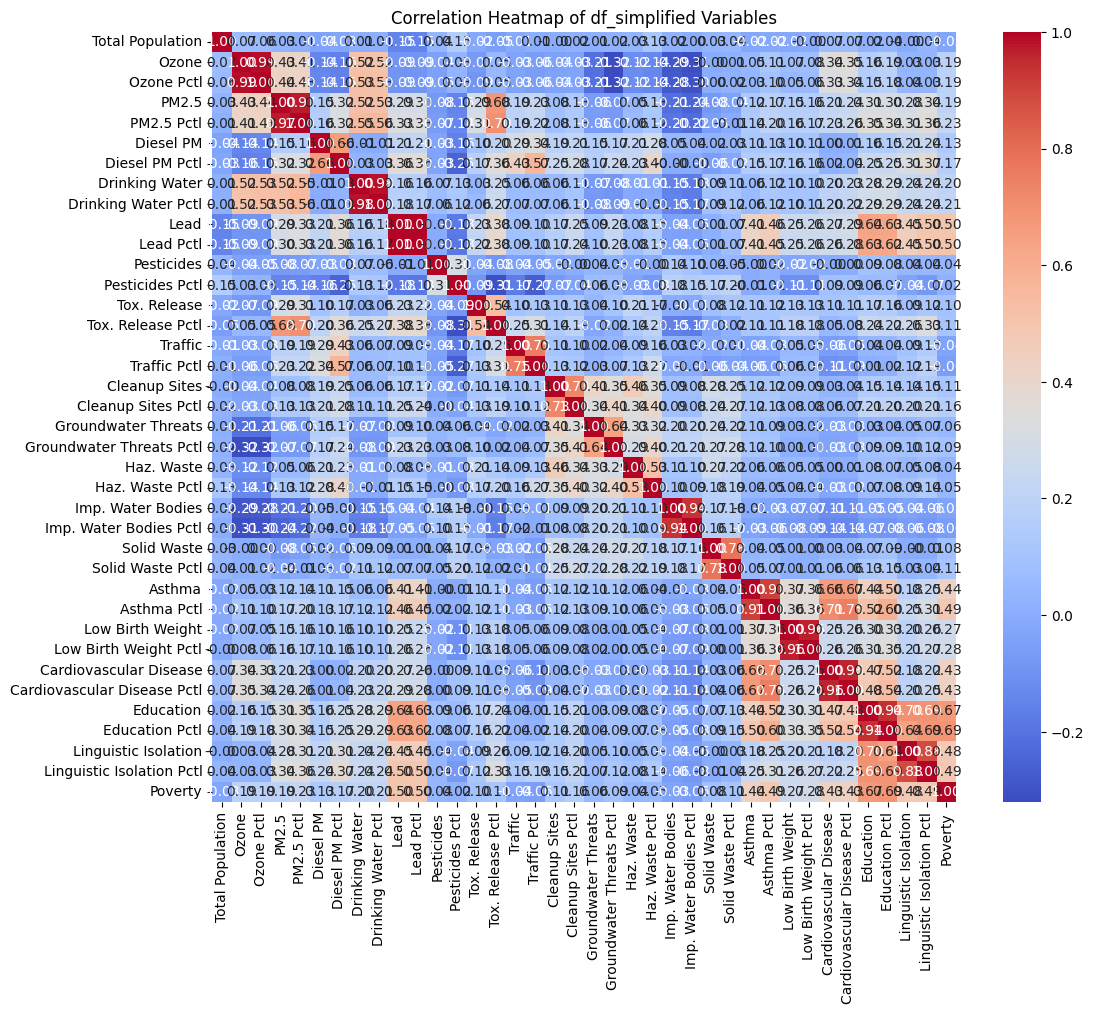

In [21]:
# heat map for df_simplified


# correlation matrix
corr_matrix = df_simplified.corr()

# heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size if needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of df_simplified Variables')
plt.show()

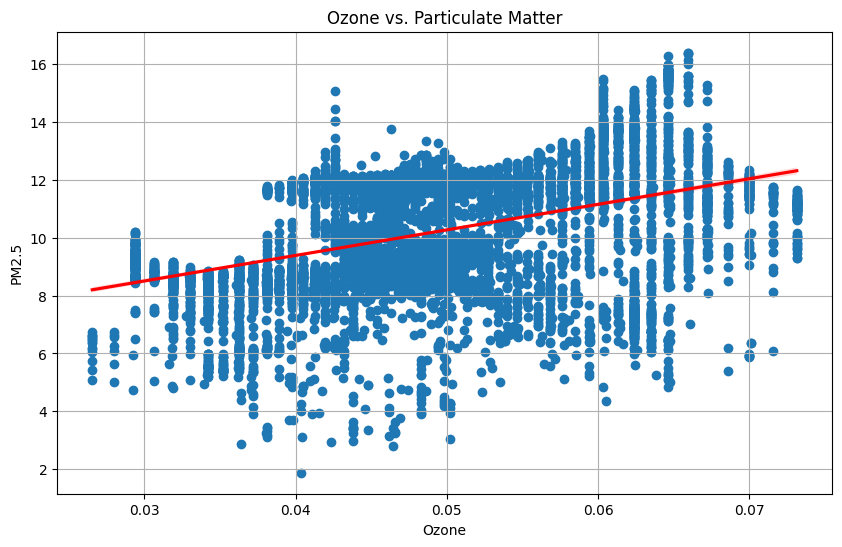

In [22]:
# plot ozone versus particulate matter

plt.figure(figsize=(10, 6))
plt.scatter(df_simplified['Ozone'], df_simplified['PM2.5'])
plt.xlabel('Ozone')
plt.ylabel('PM2.5')
plt.title('Ozone vs. Particulate Matter')
plt.grid(True)

# aadd trend line
sns.regplot(x='Ozone', y='PM2.5', data=df_simplified, scatter=False, color='red')
plt.show()



### Split into X,y
 y = "Poverty', the percent of the population living below two times the federal poverty level

 Do an 90/10 split for X_train, X_test, y_train, y_test where the random seed is equal to your 7 digit studentID number.

In [27]:
# target variable = 'Poverty'

y = df_simplified['Poverty']
X = df_simplified[['Total Population',
#
       'Ozone', 'Ozone Pctl',
       'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl', 'Drinking Water',
       'Drinking Water Pctl', 'Lead', 'Lead Pctl', 'Pesticides',
       'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl', 'Traffic',
       'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl',
       'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste',
       'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl',
       'Solid Waste', 'Solid Waste Pctl',
#
       'Asthma','Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education',
       'Education Pctl', 'Linguistic Isolation', 'Linguistic Isolation Pctl']]
print(X.shape, y.shape)

(7960, 37) (7960,)


In [28]:
# check work

# column names
print("These are the column names for X: \n", X.columns, '\n')
print("These are the column names for y: \n", y.name, '\n') # "a series doesn't have columns"

# examine data
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

print("\nThis is X:\n", X.head(10))
print("\nThis is y:\n", y.head(10))


print ("\nThis is the shape of X:, ", X.shape)
print ("\nThis is the shape of y:, ", y.shape)

These are the column names for X: 
 Index(['Total Population', 'Ozone', 'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl',
       'Diesel PM', 'Diesel PM Pctl', 'Drinking Water', 'Drinking Water Pctl',
       'Lead', 'Lead Pctl', 'Pesticides', 'Pesticides Pctl', 'Tox. Release',
       'Tox. Release Pctl', 'Traffic', 'Traffic Pctl', 'Cleanup Sites',
       'Cleanup Sites Pctl', 'Groundwater Threats', 'Groundwater Threats Pctl',
       'Haz. Waste', 'Haz. Waste Pctl', 'Imp. Water Bodies',
       'Imp. Water Bodies Pctl', 'Solid Waste', 'Solid Waste Pctl', 'Asthma',
       'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education',
       'Education Pctl', 'Linguistic Isolation', 'Linguistic Isolation Pctl'],
      dtype='object') 

These are the column names for y: 
 Poverty 


This is X:
    Total Population     Ozone  Ozone Pctl      PM2.5  PM2.5 Pctl  Diesel PM  \
0              2780  0.060311   82.476665  13.906348   97.7

In [29]:
# convert to numpy array    # removes column names, speeds up processing
X = np.array(X)
y = np.array(y)

In [32]:
# split data 90/10, shuffle, use student number for random_state
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    shuffle = True,
                                                    random_state = 2887247) # to reproduce randomness

print("This is the shape of X_train :", X_train.shape, '\n')
print("This is the shape of X_test :", X_test.shape, '\n')
print("This is the shape of y_train :", y_train.shape, '\n')
print("This is the shape of y_test :", y_test.shape, '\n')

# split looks good, test should be 10% of 7960 rows

# steamlined version of printing shape after split (as long as you remember the sequence)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

This is the shape of X_train : (7164, 37) 

This is the shape of X_test : (796, 37) 

This is the shape of y_train : (7164,) 

This is the shape of y_test : (796,) 

(7164, 37) (796, 37) (7164,) (796,)


### Standard Scaler

Use the StandardScaler() on train and apply to test partition. Do not scale the target variable!

In [33]:
# standard scaler
# use fit_transform() from StandardScaler() on X_train
# use transform() to apply that StandardScaler() to X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # apply to test partition

# Build, Compile, Fit Model

Build a model using the Sequential API (like we do in class) with at least 2 dense layers with the relu activation function, and with dropout in between each dense layer (use a number between 0.1 and 0.5). Compile the model using an appropriate optimizer. Use early stopping with patience of at least 10 and restore the best weights once the model converges. You can choose whatever batch size you would like to.

Fit the model for 100000 epochs with a batch size of your choice, using X_test and y_test as the validation data. **Don’t forget the early stopping callback!**

# Build Model1: Dense Layers = (37,37,1), Dropout = 0.3, Patience = 10, Epochs = 100000

💚 Did DrD really mean epochs = 100,000? will use as directed

https://www.sciencedirect.com/science/article/pii/S2772375522000934#:~:text=The%20training%20epochs%20should%20not,yielding%20any%20significantly%20improved%20result.

The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.


In [35]:
# refresh number of cols in X_train
# use this rather than hardcoding the input shape
X_train.shape[1]

37

In [36]:
# resets names in the model summary
K = keras.backend
K.clear_session()

In [38]:
# build a model
# let's use the number of features as the number of hidden units
# Strategy 1 from DrD CheatSheet_BuildingFFNNs notebook
model = Sequential()
model.add(Dense(37, input_shape=(X_train.shape[1],), activation='relu'))    # don't forget to add an input shape! (features,)(37 cols)
model.add(Dropout(0.3))         # specify a percentage between 0 and 0.5 (after each dense layer)

model.add(Dense(37, activation='relu'))     # input shape is inherited from prev layer
model.add(Dropout(0.3))         # specify a percentage between 0 and 0.5 (after each dense layer)

model.add(Dense(1, activation='sigmoid'))   # sigmoid activation function yields number betw 0 and 1
model.summary()                             # which then gets recoded to 0 and 1 based on 0.5 threshold

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 37)                  │           1,406 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 37)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 37)                  │           1,406 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 37)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              38 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,850 (11.13 KB)

 Trainable params: 2,850 (11.13 KB)

 Non-trainable params: 0 (0.00 B)

## Visualize Model

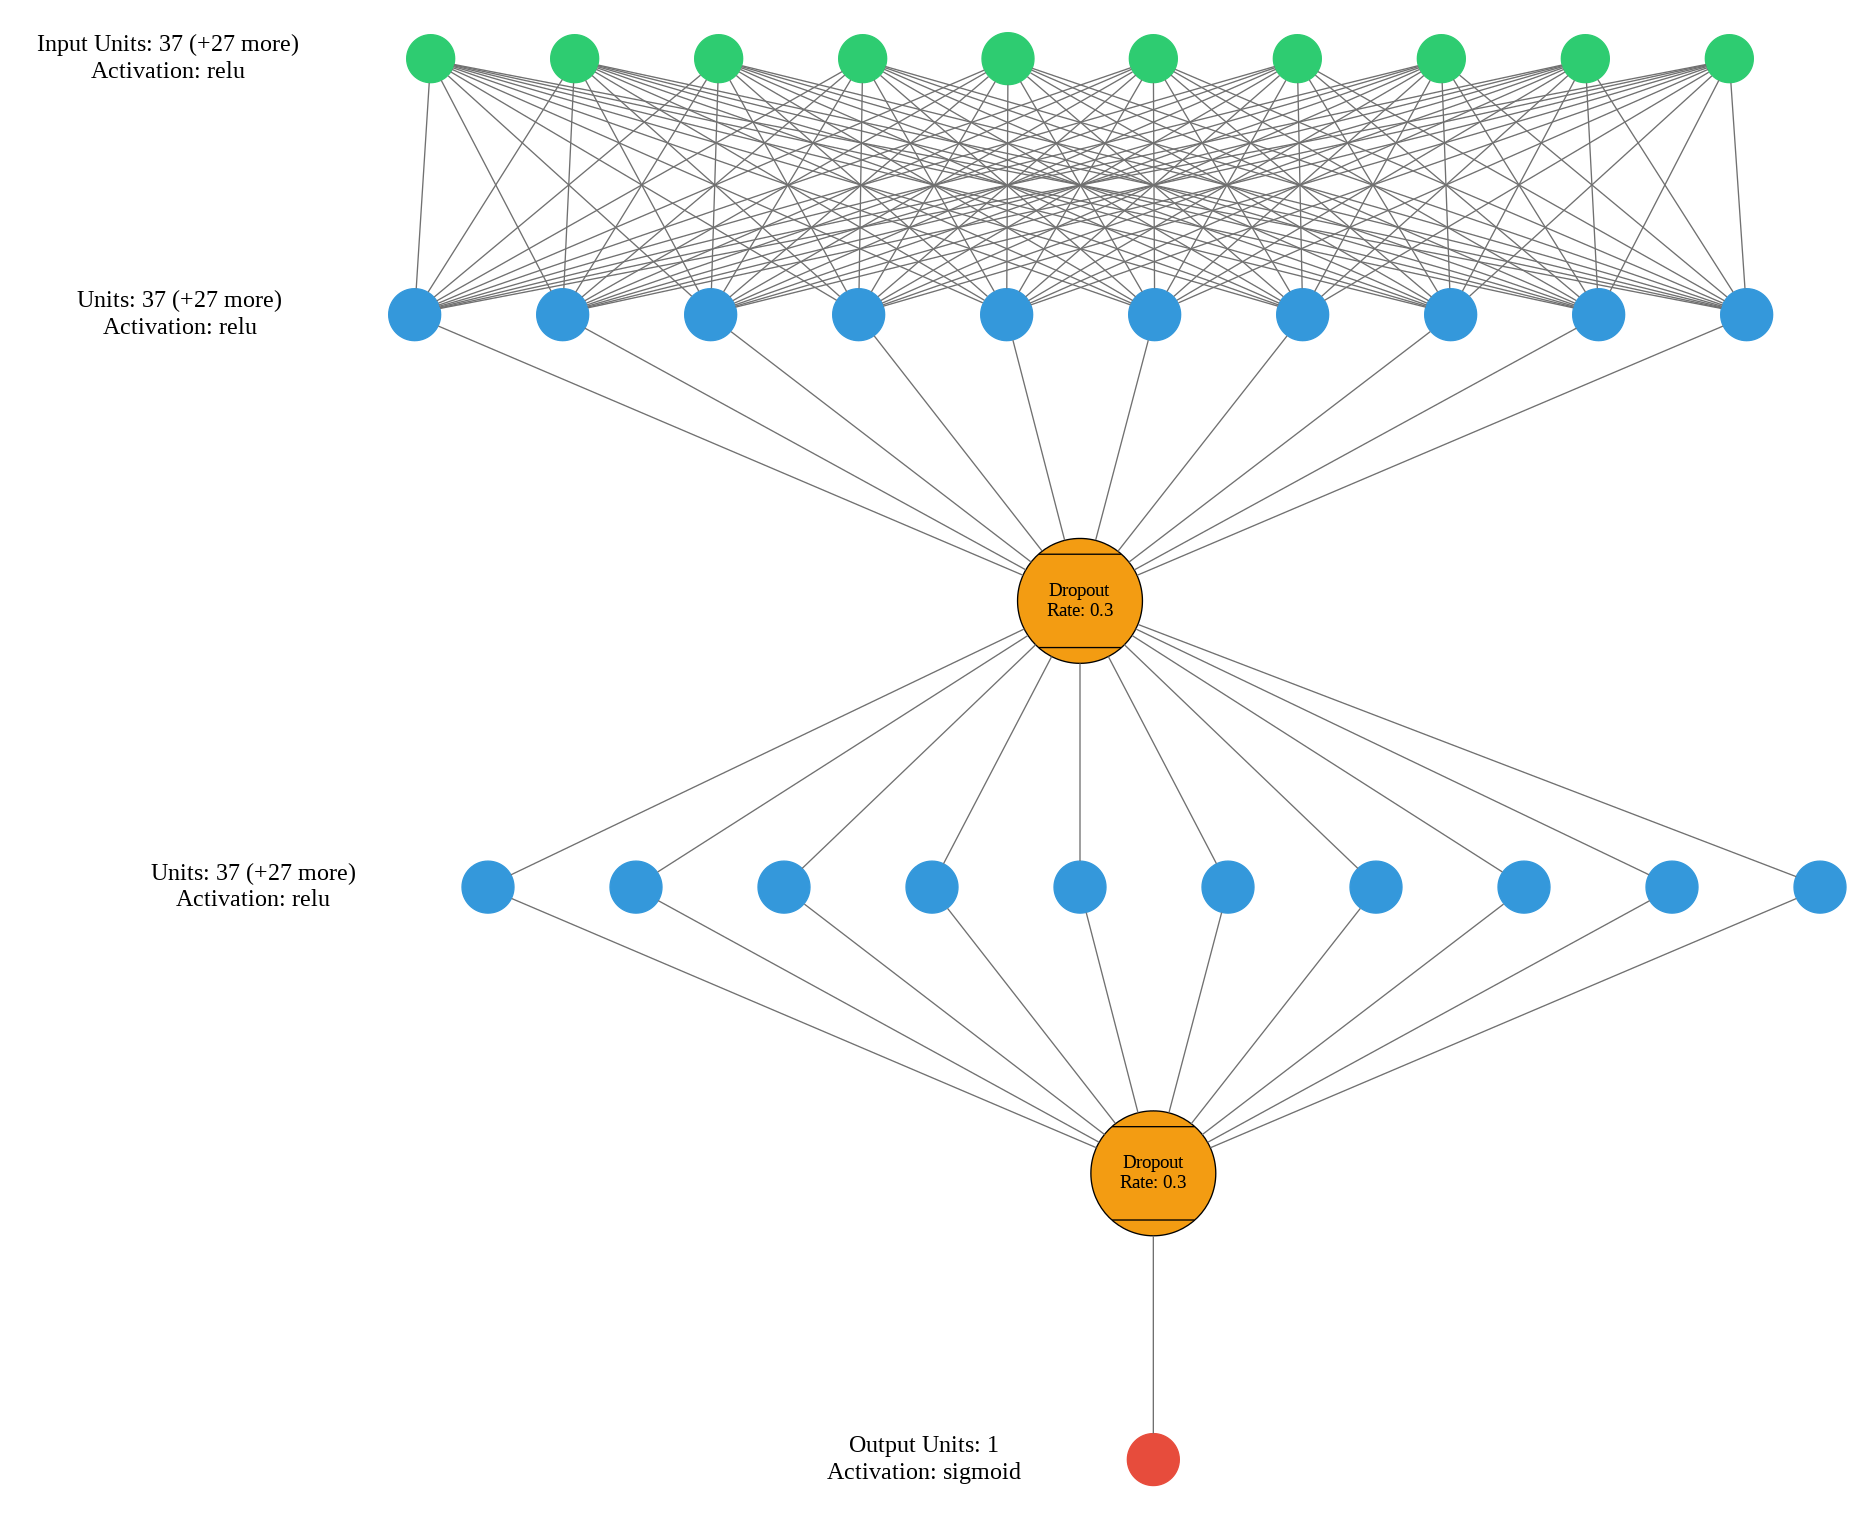

In [39]:
# visualize model
visualizer(model, file_format='png', view=True)

# view it
image_path = 'graph.png'

# display image in the notebook

Image(filename=image_path)

## Compile

Compile the model using an appropriate optimizer.

Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments. According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".
https://keras.io/api/optimizers/adam/

BinaryCrossentropy class: Computes the cross-entropy loss between true labels and predicted labels. Use this cross-entropy loss for binary (0 or 1) classification applications. https://keras.io/api/losses/probabilistic_losses/#binarycrossentropy-class



In [40]:
# compile the model
model.compile(optimizer='Adam',           # good for adaptive momentum; RMSprop is fine too
              loss='binary_crossentropy', # not MSE; helps model make more confident predictions,
              metrics=['accuracy'])       # loss function improves when more confident when values are going nearer to 0 and 1

## Callbacks/Early Stopping
Use early stopping with patience of at least 10 and restore the best weights once the model converges.

Prevents overfitting or underfitting and returns the best weights

In [41]:
es = EarlyStopping(monitor='val_accuracy',
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

## Fit the model

Fit the model for 100000 epochs with a batch size of your choice, using X_test and y_test as the validation data. You can choose whatever batch size you would like to.

Save output in the variable called `history` to be able to plot the loss curves and monitor model training.

In [42]:
# fit the model
# assign to new variable called 'history' to be able to review learning curves

history = model.fit(X_train, y_train,   # input data, target var
                    validation_data = (X_test, y_test),
                    callbacks=[es],     # early stopping callbacks encouraged
                    epochs=100000,      # set epochs to a big number
                    batch_size=50,      # hyperparameter means 50 batches of data in each epoch
                    shuffle=True,       # best practice to shuffle your data
                    verbose=1)          # prints the output as the model trains
# when X_text converges we'll stop
# monitor accuracy; should increase as epochs run

Epoch 1/100000
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6668 - loss: 0.6090 - val_accuracy: 0.8304 - val_loss: 0.3819
Epoch 2/100000
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8254 - loss: 0.4094 - val_accuracy: 0.8417 - val_loss: 0.3647
Epoch 3/100000
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8350 - loss: 0.3923 - val_accuracy: 0.8505 - val_loss: 0.3577
Epoch 4/100000
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8440 - loss: 0.3668 - val_accuracy: 0.8518 - val_loss: 0.3544
Epoch 5/100000
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8403 - loss: 0.3738 - val_accuracy: 0.8467 - val_loss: 0.3485
Epoch 6/100000
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8514 - loss: 0.3498 - val_accuracy: 0.8530 - val_loss: 0.3469
Epoch 7/100000
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8533 - loss: 0.3503 - val_accuracy: 0.8505 - val_loss: 0.3454
Epoch 8/100000
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8484 -

# Evaluate the Model
Evaluate the model using learning curves, error metrics and confusion matrices for each partition (like we do in class). You should largely be able to copy and paste this from class notebooks. Add a few bullet points about what you see (did your model learn nice and gently? If you don't have text cells here, you will lose points.

## Learning Curve for Train and Validation Accuracy

Make a learning curve for train and validation accuracy.

In [52]:
# from Dr D:
"""
 Note that the call to model.fit() returns a History object.
 This object has a member history, which is a dictionary containing data
 about everything that happened
 during training. Let’s look at it:

>>> history_dict = history.history
>>> history_dict.keys()
"""

history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

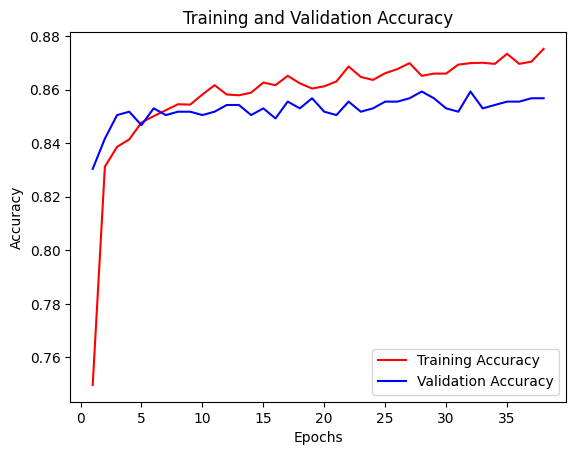

In [57]:
# learning curve

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
# "r" is for solid red line
# let's use red for training consistenly across plots

plt.plot(epochs, acc, 'r', label='Training Accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
# want loss to go down and accuracy to go up

In [54]:
# accuracy max value - should correspond to
# the HIGHEST accuracies (can look at the verbose from the model fit)

print("This is the highest train accuracy:      ", np.max(acc), '\n')
print("This is the highest validation accuracy: ", np.max(val_acc), '\n')


This is the highest train accuracy:       0.875209391117096 

This is the highest validation accuracy:  0.8592965006828308 



## Learning Curve for Train and Validation Loss

Make a learning curve for train and validation loss.

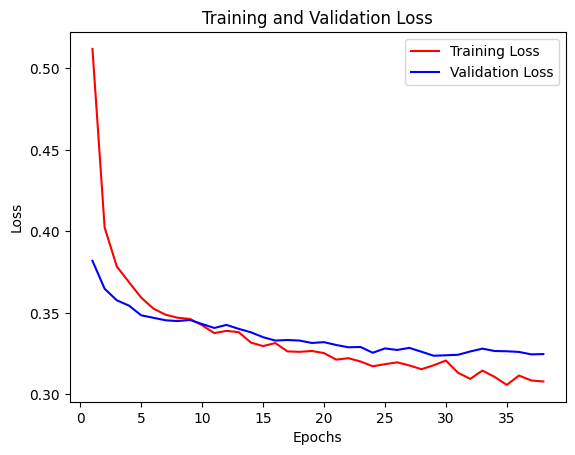

In [58]:
# learning curve

# loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "r" is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training Loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# want losss to go down and accuracy to go up

In [56]:
# loss min value - should correspond to
# the LOWEST losses (can look at the verbose from the model fit)

print("This is the lowest train loss:      ", np.min(loss), '\n')
print("This is the lowest validation loss: ", np.min(val_loss), '\n')

This is the lowest train loss:       0.30573180317878723 

This is the lowest validation loss:  0.32364577054977417 



## Classification Reports and Confusion Matrices


In [59]:
# store the predictions
# if you don't round to a whole number (0 or 1), the confusion matrix won't work!
train_preds = np.round(model.predict(X_train), 0)
test_preds = np.round(model.predict(X_test), 0)


224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [69]:
# check work
# examine train_preds and test_preds
print(train_preds)
print(test_preds)
# distribution of train_preds and test_preds
print(np.unique(train_preds, return_counts=True))
print(np.unique(test_preds, return_counts=True))

[[1.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]]
[[1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.

In [88]:
# train results
trainResults = classification_report(y_train, train_preds) # (actual, predicted)
# "don't forget to  use 'print' otherwise it looks goofy"
print("This is train: \n", trainResults)

This is train: 
               precision    recall  f1-score   support

           0       0.88      0.91      0.89      4010
           1       0.87      0.84      0.86      3154

    accuracy                           0.88      7164
   macro avg       0.88      0.87      0.87      7164
weighted avg       0.88      0.88      0.88      7164



In [84]:
# train confusion matrix
print("This is train: \n", confusion_matrix(y_train, train_preds))

# top left is TN true neg
# bottom left is FN false neg (actually 1's predicted to be 0's)
# top right is FP false pos (actually 0 predicted to be 1's)
# bottom right is TP true pos
# sum of the elements = 7164
# foots to train = 7164

This is train: 
 [[3632  378]
 [ 514 2640]]


In [85]:
# here are tp, tn, fp, fn
# The ravel() function returns a contiguous flattened array.
# This means it takes an array of any shape and returns a one-dimensional
# array containing all the elements of the original array.
# Useful when you need to work with a one-dimensional representation of
# an array, for example when using functions that only accept 1D arrays.

tn, fp, fn, tp = confusion_matrix(y_train, train_preds).ravel()
print("This is train:")
print("TP:", tp, "-", round(tp/(tp+tn+fp+fn)*100, 2),"%")
print("TN:", tn, "-", round(tn/(tp+tn+fp+fn)*100, 2),"%")
print("FP:", fp, "-", round(fp/(tp+tn+fp+fn)*100, 2),"%")
print("FN:", fn, "-", round(fn/(tp+tn+fp+fn)*100, 2),"%")

This is train:
TP: 2640 - 36.85 %
TN: 3632 - 50.7 %
FP: 378 - 5.28 %
FN: 514 - 7.17 %


In [89]:
# test results
testResults = classification_report(y_test, test_preds)
# "don't forget to use 'print' otherwise it looks goofy"
print("This is test: \n", testResults)

This is test: 
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       437
           1       0.86      0.82      0.84       359

    accuracy                           0.86       796
   macro avg       0.86      0.86      0.86       796
weighted avg       0.86      0.86      0.86       796



In [90]:
# test confusion matrix
print("This is test: \n", confusion_matrix(y_test, test_preds))

# top left is TN true neg
# bottom left is FN false neg (actually 1's predicted to be 0's)
# top right is FP false pos (actually 0 predicted to be 1's)
# bottom right is TP true pos
# sum of the elements = 796
# foots to test = 796

This is test: 
 [[388  49]
 [ 63 296]]


In [92]:
# here are tp, tn, fp, fn
tn, fp, fn, tp = confusion_matrix(y_test, test_preds).ravel()
print("This is test:")
print("TP:", tp, "-", round(tp/(tp+tn+fp+fn)*100, 2),"%")
print("TN:", tn, "-", round(tn/(tp+tn+fp+fn)*100, 2),"%")
print("FP:", fp, "-", round(fp/(tp+tn+fp+fn)*100, 2),"%")
print("FN:", fn, "-", round(fn/(tp+tn+fp+fn)*100, 2),"%")

This is test:
TP: 296 - 37.19 %
TN: 388 - 48.74 %
FP: 49 - 6.16 %
FN: 63 - 7.91 %


## Bullet Points

1. The learning curves for train and validation accuracy and loss show increasing accuracy and decreasing loss, respectively, through the epochs, which is what we want to see. Here are the maximum accuracies and the minimum losses:

    This is the highest train accuracy:       0.875209391117096

    This is the highest validation accuracy:  0.8592965006828308

    This is the lowest train loss:            0.30573180317878723

    This is the lowest validation loss:       0.32364577054977417

2. Recall that: Precision measures how many of the “positive” predictions made by the model were correct (TP/(TP+FP)).Recall measures how many of the positive class samples present in the dataset were correctly identified by the model (TP/(TP+FN)). The F1 score combines two competing metrics- precision and recall scores of a model.

  The weighted average F1 score for train was 0.88, compared to 0.86 for test, indicating a generally high score, and the closeness of the scores between the train and test sets means the model generally worked as it should.

3. Looking at the train and test confusion matrices (%s), test did slightly better predicting TPs, at the expense of predicting TNs, FPs and FNs.



## Comparison to Mean Baseline

Calculate what a baseline prediction would be for the train and test partitions (a mean only model). Did your model do better than the baseline predictions? If so, you have a useful model!

💚 Approach
1. Calculate means of y_train and y_test
2. Create baseline predictions using these means
3. Compare performance statistics of model (actual to predicted values) to that of (actual to baseline predictions)
4. Compare performance statistics of model to a dummy model that just predicts the majority class.

If my approach is correct, we can see that the model performed better than the baseline (mean) predictions which had only a weighted average F1 score of 40% (train) and 39% (test).

Also, per DrD "If your model is smart, it should have an accuracy better than a dummy model that just predicts the majority class".

We know from the value counts/distribution of the target variable:

    Poverty
    0    4447
    1    3513

that the dummy model would predict the majority class 56% of the time
 or 4447/(4447+3513)


In [93]:
# calculate the means of y_train and y_test, the target vars


train_mean = np.mean(y_train)
test_mean = np.mean(y_test)

# if you don't round to a whole number (0 or 1), the confusion matrix won't work!
train_preds = np.round(model.predict(X_train), 0)
test_preds = np.round(model.predict(X_test), 0)

# this is the new "predicted value" when comparison when
# creating baseline predictions below

# create baseline predictions for train and test
# np.full_like(y_train, mode_train) creates an array of the same shape
# as y_train, where every entry is the mode (most frequent class)

# creates a baseline prediction array for comparison with model's prediction
train_baseline_preds = np.full_like(y_train, train_mean)  # (actual, predicted)
test_baseline_preds = np.full_like(y_test, test_mean)    # (actual, predicted)

224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [96]:
# train results
trainResults = classification_report(y_train, train_baseline_preds) # (actual, predicted)
# don't forget to use 'print' otherwise it looks goofy
print("This is train: \n", trainResults)

This is train: 
               precision    recall  f1-score   support

           0       0.56      1.00      0.72      4010
           1       0.00      0.00      0.00      3154

    accuracy                           0.56      7164
   macro avg       0.28      0.50      0.36      7164
weighted avg       0.31      0.56      0.40      7164



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [101]:
# train confusion matrix

print("This is train: \n", confusion_matrix(y_train, train_baseline_preds))

# top left is TN true neg
# bottom left is FN false neg (actually 1's predicted to be 0's)
# top right is FP false pos (actually 0 predicted to be 1's)
# bottom right is TP true pos
# sum of the elements - 6368
# foots to train = 6368

This is train: 
 [[4010    0]
 [3154    0]]


In [102]:
# here are tp, tn, fp, fn
tn, fp, fn, tp = confusion_matrix(y_train, train_baseline_preds).ravel()
print("This is train:")
print("TP:", tp, "-", round(tp/(tp+tn+fp+fn)*100, 2),"%")
print("TN:", tn, "-", round(tn/(tp+tn+fp+fn)*100, 2),"%")
print("FP:", fp, "-", round(fp/(tp+tn+fp+fn)*100, 2),"%")
print("FN:", fn, "-", round(fn/(tp+tn+fp+fn)*100, 2),"%")

This is train:
TP: 0 - 0.0 %
TN: 4010 - 55.97 %
FP: 0 - 0.0 %
FN: 3154 - 44.03 %


In [103]:
# test results
testResults = classification_report(y_test, test_baseline_preds)
# don't forget to use 'print' otherwise it looks goofy
print("This is test: \n", (testResults))

This is test: 
               precision    recall  f1-score   support

           0       0.55      1.00      0.71       437
           1       0.00      0.00      0.00       359

    accuracy                           0.55       796
   macro avg       0.27      0.50      0.35       796
weighted avg       0.30      0.55      0.39       796



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [104]:
# test confusion matrix
print("This is test: \n", confusion_matrix(y_test, test_baseline_preds))

# top left is TN true neg
# bottom left is FN false neg (actually 1's predicted to be 0's)
# top right is FP false pos (actually 0 predicted to be 1's)
# bottom right is TP true pos
# sum of the elements = 1592
# foots to test = 1592

This is test: 
 [[437   0]
 [359   0]]


In [105]:
# here are tp, tn, fp, fn
tn, fp, fn, tp = confusion_matrix(y_test, test_baseline_preds).ravel()
print("This is test: \n")
print("TP:", tp, "-", round(tp/(tp+tn+fp+fn)*100, 2),"%")
print("TN:", tn, "-", round(tn/(tp+tn+fp+fn)*100, 2),"%")
print("FP:", fp, "-", round(fp/(tp+tn+fp+fn)*100, 2),"%")
print("FN:", fn, "-", round(fn/(tp+tn+fp+fn)*100, 2),"%")

This is test: 

TP: 0 - 0.0 %
TN: 437 - 54.9 %
FP: 0 - 0.0 %
FN: 359 - 45.1 %
